### Part 0b: Merging all the datasets into one and exporting it

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import linregress

In [19]:
### Ingest the data files
cleaned_hpi_price_data = pd.read_csv('data/cleaned data/cleaned_hpi_price_data.csv')
recession_flag = pd.read_csv('data/cleaned data/recession_flag_yearly.csv')
fed_funds_rate = pd.read_csv('data/fedfundsrate.csv')
fed_funds_rate_year = pd.read_csv('data/cleaned data/yearly_fed_rates_mean.csv')
med_hh_income_us = pd.read_csv('data/cleaned data/median_household_income_us.csv')
unemployment_us = pd.read_csv('data/cleaned data/unemployment_in_us.csv')
state_population = pd.read_csv('data/cleaned data/apportionment.csv')
state_zip = pd.read_csv('data/cleaned data/state_zip.csv')

In [20]:
cleaned_hpi_price_data = cleaned_hpi_price_data.drop(['zip_code', 'normalized_sale_price_2012'], axis = 1)
cleaned_hpi_price_data.head(5)

,Five-Digit ZIP Code,Year,Annual Change (%),HPI,HPI from 2012,HPI with 2012 base,normalized_sale_price
0,1001.0,1984,.,100.00,279.95,0.357207,58369.688570
1,1001.0,1985,16.00,116.00,279.95,0.414360,67708.838742
2,1001.0,1986,14.21,132.48,279.95,0.473227,77328.163418
3,1001.0,1987,21.08,160.41,279.95,0.572995,93630.817436
4,1001.0,1988,17.63,188.68,279.95,0.673977,110131.928394


In [21]:
recession_flag.head(10)

,YEAR,RECESSION_FLAG
0,1967,0
1,1968,0
2,1969,1
3,1970,1
4,1971,0
5,1972,0
6,1973,1
7,1974,1
8,1975,1
9,1976,0


In [22]:
fed_funds_rate_year.head(10)

,YEAR,avg_rate_for_year
0,1954,1.008333
1,1955,1.785000
2,1956,2.728333
3,1957,3.105000
4,1958,1.572500
5,1959,3.305000
6,1960,3.215833
7,1961,1.955000
8,1962,2.708333
9,1963,3.178333


In [23]:
med_hh_income_us.head()

,DATE,Median_hh_income,Year
0,1984-01-01,55828,1984
1,1985-01-01,56871,1985
2,1986-01-01,58920,1986
3,1987-01-01,59624,1987
4,1988-01-01,60115,1988


In [24]:
unemployment_us.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_Average
0,1984,8.0,7.8,7.8,7.7,7.4,7.2,7.5,7.5,7.3,7.4,7.2,7.3,7.7
1,1985,7.3,7.2,7.2,7.3,7.2,7.4,7.4,7.1,7.1,7.1,7.0,7.0,7.2
2,1986,6.7,7.2,7.2,7.1,7.2,7.2,7.0,6.9,7.0,7.0,6.9,6.6,6.7
3,1987,6.6,6.6,6.6,6.3,6.3,6.2,6.1,6.0,5.9,6.0,5.8,5.7,6.2
4,1988,5.7,5.7,5.7,5.4,5.6,5.4,5.4,5.6,5.4,5.4,5.3,5.3,5.5


In [25]:
state_zip.head()

,state,zip_code
0,Arkansas,71923
1,New Jersey,7110
2,Idaho,83340
3,Michigan,49341
4,Oklahoma,73072


In [26]:
state_population.head()

,Name,State_Num,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
0,Alabama,22.0,State,1910,2138093,16.9,42.2,25,10.0,1.0,"213,809"
1,Alabama,22.0,State,1920,2348174,9.8,46.4,25,10.0,0.0,"234,817"
2,Alabama,22.0,State,1930,2646248,12.7,52.3,24,9.0,-1.0,"294,027"
3,Alabama,22.0,State,1940,2832961,7.1,55.9,23,9.0,0.0,"314,773"
4,Alabama,22.0,State,1950,3061743,8.1,60.5,24,9.0,0.0,"340,194"


In [27]:
unemployment_us_avg = unemployment_us[['Year', 'Year_Average']]
unemployment_us_avg = unemployment_us_avg.rename(columns={'Year_Average':"Year_Avg_Unempl"})
unemployment_us_avg.head()

,Year,Year_Avg_Unempl
0,1984,7.7
1,1985,7.2
2,1986,6.7
3,1987,6.2
4,1988,5.5


In [28]:
# merge all the data into a single dataframe
total_market_data = cleaned_hpi_price_data.merge(recession_flag, left_on=['Year'], right_on=['YEAR'])
total_market_data = total_market_data.merge(fed_funds_rate_year, left_on=['Year'], right_on=['YEAR'])
total_market_data = total_market_data.merge(med_hh_income_us, left_on=['Year'], right_on = ['Year'])
total_market_data = total_market_data.merge(unemployment_us_avg, left_on = ['Year'], right_on = ['Year'])
total_market_data = total_market_data.merge(state_zip, left_on=['Five-Digit ZIP Code'], right_on=['zip_code'])

In [29]:
total_market_data

,Five-Digit ZIP Code,Year,Annual Change (%),HPI,HPI from 2012,HPI with 2012 base,normalized_sale_price,YEAR_x,RECESSION_FLAG,YEAR_y,avg_rate_for_year,DATE,Median_hh_income,Year_Avg_Unempl,state,zip_code
0,1001.0,1984,.,100.00,279.95,0.357207,58369.688570,1984,0,1984,10.225000,1984-01-01,55828,7.7,Massachusetts,1001
1,1001.0,1985,16.00,116.00,279.95,0.414360,67708.838742,1985,0,1985,8.100833,1985-01-01,56871,7.2,Massachusetts,1001
2,1001.0,1986,14.21,132.48,279.95,0.473227,77328.163418,1986,0,1986,6.805000,1986-01-01,58920,6.7,Massachusetts,1001
3,1001.0,1987,21.08,160.41,279.95,0.572995,93630.817436,1987,0,1987,6.657500,1987-01-01,59624,6.2,Massachusetts,1001
4,1001.0,1988,17.63,188.68,279.95,0.673977,110131.928394,1988,0,1988,7.568333,1988-01-01,60115,5.5,Massachusetts,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429460,83323.0,2018,.,-1.00,100.00,-0.010000,217231.000000,2018,0,2018,1.831667,2018-01-01,68168,4.0,Idaho,83323
429461,83323.0,2019,.,150.62,100.00,1.506200,223000.000000,2019,0,2019,2.158333,2019-01-01,72808,3.8,Idaho,83323
429462,83323.0,2020,-1.02,149.08,100.00,1.490800,407727.000000,2020,1,2020,0.375833,2020-01-01,71186,5.1,Idaho,83323
429463,83323.0,2021,20.14,179.12,100.00,1.791200,277714.000000,2021,0,2021,0.080000,2021-01-01,70784,5.1,Idaho,83323


In [30]:
def bucket_years(year):
    if year < 1971:
        return None
    elif year <= 1980:
        return 1980
    elif year <= 1990:
        return 1990
    elif year <= 2000:
        return 2000
    elif year <=2010:
        return 2010
    else:
        return 2020

# Apply function to year column to create new bucketed year column
total_market_data['bucketed_year'] = total_market_data['Year'].apply(bucket_years)
total_market_data = total_market_data.drop(['YEAR_x', 'YEAR_y', 'DATE'], axis = 1)
total_market_data.head()

,Five-Digit ZIP Code,Year,Annual Change (%),HPI,HPI from 2012,HPI with 2012 base,normalized_sale_price,RECESSION_FLAG,avg_rate_for_year,Median_hh_income,Year_Avg_Unempl,state,zip_code,bucketed_year
0,1001.0,1984,.,100.00,279.95,0.357207,58369.688570,0,10.225000,55828,7.7,Massachusetts,1001,1990
1,1001.0,1985,16.00,116.00,279.95,0.414360,67708.838742,0,8.100833,56871,7.2,Massachusetts,1001,1990
2,1001.0,1986,14.21,132.48,279.95,0.473227,77328.163418,0,6.805000,58920,6.7,Massachusetts,1001,1990
3,1001.0,1987,21.08,160.41,279.95,0.572995,93630.817436,0,6.657500,59624,6.2,Massachusetts,1001,1990
4,1001.0,1988,17.63,188.68,279.95,0.673977,110131.928394,0,7.568333,60115,5.5,Massachusetts,1001,1990


In [31]:
state_population.head()

,Name,State_Num,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
0,Alabama,22.0,State,1910,2138093,16.9,42.2,25,10.0,1.0,"213,809"
1,Alabama,22.0,State,1920,2348174,9.8,46.4,25,10.0,0.0,"234,817"
2,Alabama,22.0,State,1930,2646248,12.7,52.3,24,9.0,-1.0,"294,027"
3,Alabama,22.0,State,1940,2832961,7.1,55.9,23,9.0,0.0,"314,773"
4,Alabama,22.0,State,1950,3061743,8.1,60.5,24,9.0,0.0,"340,194"


In [32]:
total_market_data = total_market_data.merge(state_population[['Name','State_Num','Year', 'Resident Population', 'Percent Change in Resident Population']], left_on=['bucketed_year', 'state'], right_on=['Year', 'Name'], how='left')


In [33]:
total_market_data.drop(['Name', 'Year_y'], axis=1, inplace=True)
total_market_data = total_market_data.rename(columns={'Year_x': 'year'})
total_market_data.head()

,Five-Digit ZIP Code,year,Annual Change (%),HPI,HPI from 2012,HPI with 2012 base,normalized_sale_price,RECESSION_FLAG,avg_rate_for_year,Median_hh_income,Year_Avg_Unempl,state,zip_code,bucketed_year,State_Num,Resident Population,Percent Change in Resident Population
0,1001.0,1984,.,100.00,279.95,0.357207,58369.688570,0,10.225000,55828,7.7,Massachusetts,1001,1990,6.0,6016425.0,4.9
1,1001.0,1985,16.00,116.00,279.95,0.414360,67708.838742,0,8.100833,56871,7.2,Massachusetts,1001,1990,6.0,6016425.0,4.9
2,1001.0,1986,14.21,132.48,279.95,0.473227,77328.163418,0,6.805000,58920,6.7,Massachusetts,1001,1990,6.0,6016425.0,4.9
3,1001.0,1987,21.08,160.41,279.95,0.572995,93630.817436,0,6.657500,59624,6.2,Massachusetts,1001,1990,6.0,6016425.0,4.9
4,1001.0,1988,17.63,188.68,279.95,0.673977,110131.928394,0,7.568333,60115,5.5,Massachusetts,1001,1990,6.0,6016425.0,4.9


In [34]:
total_market_data.to_csv('data/cleaned data/total_market_data_merged.csv')

# Visualization

In [52]:
import os

average_hpi = total_market_data.groupby("year").mean()["HPI"]

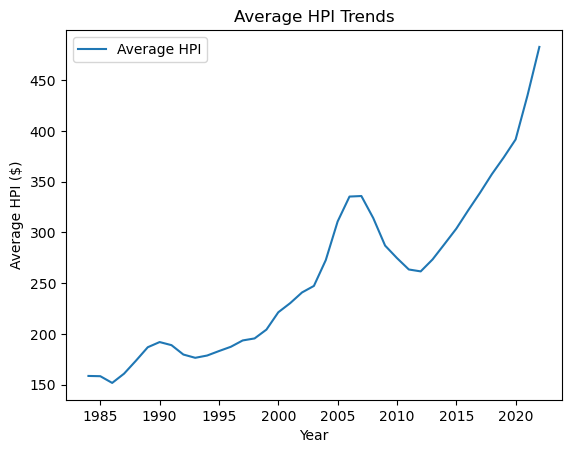

In [57]:
plt.plot(average_hpi, label='Average HPI')
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Average HPI ($)")
plt.title("Average HPI Trends")
fig1 = plt.show()
fig1


In [71]:
#separate recession years to compare the two
recession = total_market_data[total_market_data["RECESSION_FLAG"]==1]
recession = recession.groupby("year").mean()['normalized_sale_price']
no_recession = total_market_data[total_market_data["RECESSION_FLAG"]==0]
no_recession = no_recession.groupby("year").mean()['normalized_sale_price']


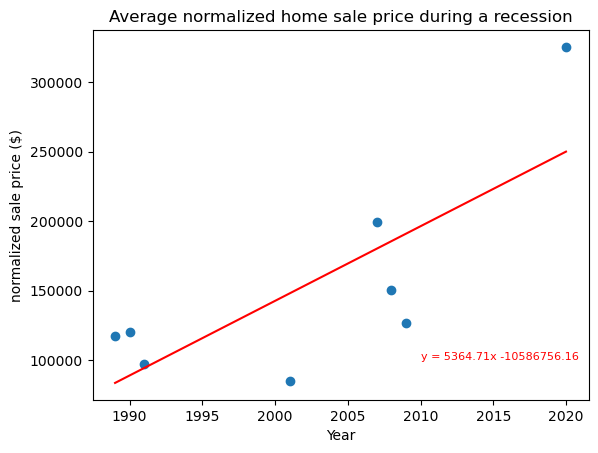

In [77]:
#recession trends 
x = recession.index
y = recession
plt.scatter(x, y, label = "normalized sale price")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x "+ str(round(intercept, 2))
plt.plot(x, regress_values, 'r-')

plt.annotate(line_eq, (2010, 100000), fontsize = 8, color = 'r')
plt.ylabel("normalized sale price ($)")
plt.xlabel("Year")
plt.title("Average normalized home sale price during a recession")
plt.show()

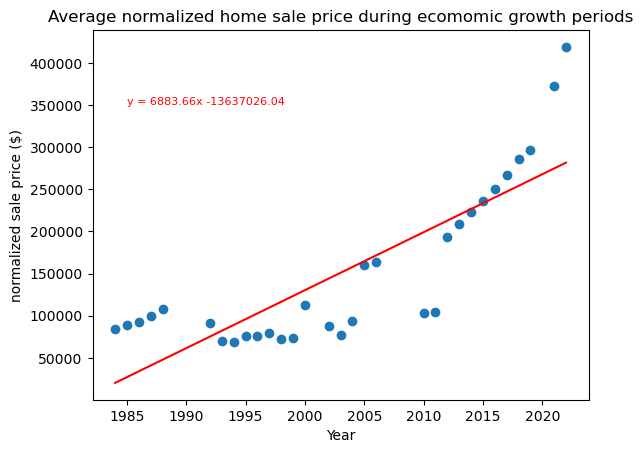

In [76]:
#out of recession trends
x= no_recession.index
y= no_recession
plt.scatter(x, y, label = "normalized sale price")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x "+ str(round(intercept, 2))
plt.plot(x, regress_values, 'r-')

plt.annotate(line_eq, (1985, 350000), fontsize = 8, color = 'r')
plt.ylabel("normalized sale price ($)")
plt.xlabel("Year")
plt.title("Average normalized home sale price during ecomomic growth periods")
plt.show()